In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [3]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

     |████████████████████████████████| 11.3 MB 13.6 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.5 which is incompatible.


     |████████████████████████████████| 109 kB 22.0 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


# 가상 포트폴리오

In [21]:
assets = ["094280.KS", "002960.KS", "105630.KS", "025000.KS", "003780.KS", "003650.KS", "024900.KS", "015230.KS", "111770.KS", "007700.KS"]
#assets = ["000990.KS", "096770.KS", "032350.KS"]

In [22]:
# 기본적인 포트폴리오 구성 -> 각 주식이 동등한 가중치 갖도록 설정
# 여기서는 종목별로 20%씩 보유하는 포트폴리오 구성.
# 100만원이 있으면 각 주식을 20만원씩 매수했다고 생각

weights = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
#weights = np.array([1/3, 1/3, 1/3])
weights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [23]:
stockStartDate = '2011-01-01'

stockEndDate = '2019-12-31'
#today = datetime.today().strftime('%Y-%m-%d')

In [24]:
df = pd.DataFrame()

for stock in assets:
  df[stock] = web.DataReader(stock, data_source = "yahoo", start = stockStartDate, end = stockEndDate)['Adj Close']

df

,094280.KS,002960.KS,105630.KS,025000.KS,003780.KS,003650.KS,024900.KS,015230.KS,111770.KS,007700.KS
Date,,,,,,,,,,
2011-01-03,4406.056641,128701.335938,4232.490234,41720.906250,1035.683105,43545.343750,574.612732,2690.618652,9674.500977,9533.551758
2011-01-04,4278.344238,131351.953125,4110.089844,41240.558594,1029.992432,41296.875000,580.164490,2711.476074,9950.915039,9653.362305
2011-01-05,4310.272949,131940.921875,4187.395508,41789.527344,1024.301880,41371.824219,577.388611,2701.047119,9812.707031,9841.637695
2011-01-06,4246.416016,131646.421875,4187.395508,41858.144531,1027.147217,41896.468750,555.181335,2701.047119,9674.500977,9841.637695
2011-01-07,4246.416016,131057.406250,4290.470703,41926.761719,1029.992432,41896.468750,557.957275,2805.334961,9582.362305,9824.520508
...,...,...,...,...,...,...,...,...,...,...
2019-12-23,14743.928711,306779.750000,16007.059570,51511.316406,3715.009521,73413.789062,1195.000000,5427.486328,33605.996094,208404.140625
2019-12-24,15474.279297,308139.218750,16384.806641,52967.464844,3599.922607,74923.585938,1230.000000,5511.997559,33557.363281,206456.421875
2019-12-26,15565.571289,310404.937500,16526.462891,52148.382812,3613.733154,74829.226562,1220.000000,5521.387695,32876.488281,211325.687500


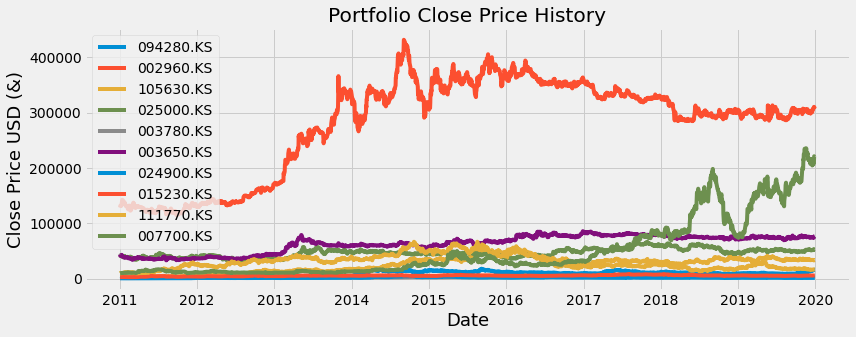

In [25]:
title = 'Portfolio Close Price History'

my_stocks = df

plt.figure(figsize=(12.2, 4.5))

for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD (&)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()

# 재무 계산

In [26]:
## 일일 단순 수익률

returns_sim = df.pct_change()
returns_sim

,094280.KS,002960.KS,105630.KS,025000.KS,003780.KS,003650.KS,024900.KS,015230.KS,111770.KS,007700.KS
Date,,,,,,,,,,
2011-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04,-0.028986,0.020595,-0.028919,-0.011513,-0.005495,-0.051635,0.009662,0.007752,0.028571,0.012567
2011-01-05,0.007463,0.004484,0.018809,0.013311,-0.005525,0.001815,-0.004785,-0.003846,-0.013889,0.019504
2011-01-06,-0.014815,-0.002232,0.000000,0.001642,0.002778,0.012681,-0.038462,0.000000,-0.014084,0.000000
2011-01-07,0.000000,-0.004474,0.024616,0.001639,0.002770,0.000000,0.005000,0.038610,-0.009524,-0.001739
...,...,...,...,...,...,...,...,...,...,...
2019-12-23,-0.021212,0.001479,-0.008772,-0.007018,-0.003704,-0.008917,-0.036290,-0.001727,-0.005755,-0.027273
2019-12-24,0.049536,0.004431,0.023599,0.028269,-0.030979,0.020566,0.029289,0.015571,-0.001447,-0.009346
2019-12-26,0.005900,0.007353,0.008646,-0.015464,0.003836,-0.001259,-0.008130,0.001704,-0.020290,0.023585


In [28]:
returns_sim['sum'] = (returns_sim['094280.KS'] + returns_sim['002960.KS'] + returns_sim['105630.KS'] + returns_sim['025000.KS'] + returns_sim['003780.KS'] + returns_sim['003650.KS'] + returns_sim['024900.KS'] + returns_sim['015230.KS'] + returns_sim['111770.KS'] + returns_sim['007700.KS'])/10
#returns_sim['sum'] = (returns_sim['000990.KS'] + returns_sim['096770.KS'] + returns_sim['032350.KS'])

returns_sim

,094280.KS,002960.KS,105630.KS,025000.KS,003780.KS,003650.KS,024900.KS,015230.KS,111770.KS,007700.KS,sum
Date,,,,,,,,,,,
2011-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04,-0.028986,0.020595,-0.028919,-0.011513,-0.005495,-0.051635,0.009662,0.007752,0.028571,0.012567,-0.004740
2011-01-05,0.007463,0.004484,0.018809,0.013311,-0.005525,0.001815,-0.004785,-0.003846,-0.013889,0.019504,0.003734
2011-01-06,-0.014815,-0.002232,0.000000,0.001642,0.002778,0.012681,-0.038462,0.000000,-0.014084,0.000000,-0.005249
2011-01-07,0.000000,-0.004474,0.024616,0.001639,0.002770,0.000000,0.005000,0.038610,-0.009524,-0.001739,0.005690
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,-0.021212,0.001479,-0.008772,-0.007018,-0.003704,-0.008917,-0.036290,-0.001727,-0.005755,-0.027273,-0.011919
2019-12-24,0.049536,0.004431,0.023599,0.028269,-0.030979,0.020566,0.029289,0.015571,-0.001447,-0.009346,0.012949
2019-12-26,0.005900,0.007353,0.008646,-0.015464,0.003836,-0.001259,-0.008130,0.001704,-0.020290,0.023585,0.000588


In [29]:
## 누적곱 계산

returns_acc = (1 + returns_sim).cumprod()
returns_acc

,094280.KS,002960.KS,105630.KS,025000.KS,003780.KS,003650.KS,024900.KS,015230.KS,111770.KS,007700.KS,sum
Date,,,,,,,,,,,
2011-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04,0.971014,1.020595,0.971081,0.988487,0.994505,0.948365,1.009662,1.007752,1.028571,1.012567,0.995260
2011-01-05,0.978261,1.025171,0.989346,1.001645,0.989011,0.950086,1.004831,1.003876,1.014286,1.032316,0.998976
2011-01-06,0.963768,1.022883,0.989346,1.003289,0.991758,0.962134,0.966183,1.003876,1.000000,1.032316,0.993732
2011-01-07,0.963768,1.018306,1.013699,1.004934,0.994505,0.962134,0.971014,1.042636,0.990476,1.030520,0.999387
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,3.346287,2.383656,3.781948,1.234664,3.587014,1.685916,2.079662,2.017189,3.473667,21.860073,5.089806
2019-12-24,3.512047,2.394219,3.871198,1.269566,3.475892,1.720588,2.140572,2.048599,3.468640,21.655772,5.155712
2019-12-26,3.532767,2.411824,3.904667,1.249934,3.489227,1.718421,2.123169,2.052089,3.398262,22.166522,5.158744


In [30]:
## 개별 주식 및 포트폴리오의 CAGR 값

CAGR = returns_acc.loc['2019-12-30',:] ** (252./len(df.index)) -1
print('CAGR :\n',round(CAGR*100,2),'%')

CAGR :
 094280.KS    15.57
002960.KS    10.40
105630.KS    17.00
025000.KS     2.63
003780.KS    16.01
003650.KS     6.68
024900.KS     9.20
015230.KS     8.76
111770.KS    15.27
007700.KS    42.95
sum          20.82
Name: 2019-12-30 00:00:00, dtype: float64 %


In [31]:
## 각 기업의 MDD 값

for i in df.columns[:]:
  historical_max = df[i].cummax()
  daily_drawdown = df[i] / historical_max - 1.0
  historical_dd = daily_drawdown.cummin()
  
  MDD = historical_dd.min()

  print('MDD : ',round(-1*MDD*100,2),'%')  

MDD :  55.42 %
MDD :  34.08 %
MDD :  77.38 %
MDD :  37.11 %
MDD :  61.1 %
MDD :  31.12 %
MDD :  78.17 %
MDD :  46.01 %
MDD :  62.91 %
MDD :  62.87 %


In [32]:
## 포트폴리오의 MDD 값

historical_max = returns_acc['sum'].cummax()
daily_drawdown = returns_acc['sum'] / historical_max - 1.0
historical_dd = daily_drawdown.cummin()
  
MDD_sum = historical_dd.min()

print('MDD_sum : ',round(-1*MDD_sum*100,2),'%')
  

MDD_sum :  20.29 %


In [33]:
## 개별 주식 및 포트폴리오의 Sharpe Ratio 값
for i in returns_sim.columns[:]:
  Sharpe = np.mean(returns_sim[i]) / np.std(returns_sim[i]) * np.sqrt(252.)

  print('Sharpe : ',round(Sharpe,2))

Sharpe :  0.54
Sharpe :  0.58
Sharpe :  0.58
Sharpe :  0.23
Sharpe :  0.6
Sharpe :  0.41
Sharpe :  0.42
Sharpe :  0.44
Sharpe :  0.56
Sharpe :  0.98
Sharpe :  1.22


# 벤치마크

In [15]:
df_bm = pd.DataFrame()

df_bm['KOSPI'] = web.DataReader('^KS11', data_source = "yahoo", start = stockStartDate, end = stockEndDate)['Adj Close']
df_bm

,KOSPI
Date,
2011-01-03,2070.080078
2011-01-04,2085.139893
2011-01-05,2082.550049
2011-01-06,2077.610107
2011-01-07,2086.199951
...,...
2019-12-23,2203.709961
2019-12-24,2190.080078
2019-12-26,2197.929932


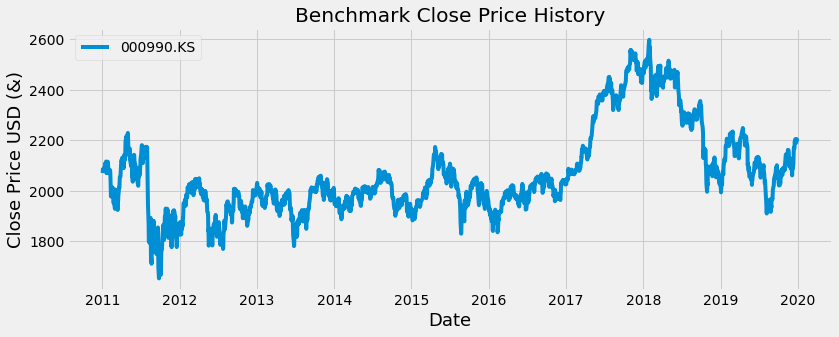

In [16]:
title = 'Benchmark Close Price History'

my_bm = df_bm

plt.figure(figsize=(12.2, 4.5))

for c in my_bm.columns.values:
  plt.plot(my_bm[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD (&)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()

In [ ]:
## 일일 단순 수익률

returns_bmsim = df_bm.pct_change()
returns_bmsim

,KOSPI
Date,
2011-01-03,NaN
2011-01-04,0.007275
2011-01-05,-0.001242
2011-01-06,-0.002372
2011-01-07,0.004134
...,...
2012-12-21,-0.009542
2012-12-24,0.000707
2012-12-26,0.000217


In [ ]:
## 누적곱 계산

returns_bmacc = (1 + returns_bmsim).cumprod()
returns_bmacc

,KOSPI
Date,
2011-01-03,NaN
2011-01-04,1.007275
2011-01-05,1.006024
2011-01-06,1.003638
2011-01-07,1.007787
...,...
2012-12-21,0.956688
2012-12-24,0.957364
2012-12-26,0.957572


In [ ]:
## CAGR 값

CAGR_bm = returns_bmacc.loc['2012-12-28',:] ** (252./len(df.index)) -1
print('CAGR_bm :\n',round(CAGR_bm*100,2),'%')

CAGR_bm :
 KOSPI   -1.81
Name: 2012-12-28 00:00:00, dtype: float64 %


In [ ]:
## MDD 값

for i in df_bm.columns[:]:
  historical_bmmax = df_bm[i].cummax()
  daily_bmdrawdown = df_bm[i] / historical_bmmax - 1.0
  historical_bmdd = daily_bmdrawdown.cummin()
  
  MDD_bm = historical_bmdd.min()

  print('MDD_bm : ',round(-1*MDD_bm*100,2),'%')

MDD_bm :  25.85 %


In [ ]:
## 개별 주식 및 포트폴리오의 Sharpe Ratio 값
for i in returns_bmsim.columns[:]:
  Sharpe_bm = np.mean(returns_bmsim[i]) / np.std(returns_bmsim[i]) * np.sqrt(252.)

  print('Sharpe_bm : ',round(Sharpe_bm,2))

Sharpe_bm :  0.02


# 공분산

In [ ]:
## 연간 공분산 행렬 계산 및 출력

# 공분산 행렬 : 서로 다른 모집단의 데이터 샘플을 비교할 때 통계에서 일반적으로 사용되는 수학점 개념이며, 두 개의 임의 변수가 얼마나 변하거나 함께 이동하는지를 결정하는 데에 사용됩니다. 따라서 공분산 행렬을 통해 두 자산 가격간의 방향 관계를 알아낼 수 있습니다.
# 행렬의 대각선은 분산, 다른 항목은 공분산
# 연간 공분산 행렬을 표시하려면 공분산 행렬에 현재 연도의 거래 일수를 곱해야함

cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

NameError: ignored

In [ ]:
## 포트폴리오 분산을 계산 및 출력

port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

NameError: ignored

In [ ]:
## 포트폴리오 변동성 계산 및 출력

#변동성(=표준 편차)

port_volatility = np.sqrt(port_variance)
port_volatility

0.24373717303797082

In [ ]:
# 포트폴리오 연간 단순 수익률 계산 및 출력

portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.3450398801833613

In [ ]:
# 예상 연간 수익, 변동성 또는 위험 및 분산 계산 및 출력

percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'
print("Expected annual return : " + percent_ret)
print("Annual volatility/standard deviation/risk : " + percent_vols)
print("Annual variance : " + percent_var)

Expected annual return : 35.0%
Annual volatility/standard deviation/risk : 24.0%
Annual variance : 6.0%


In [ ]:
# 동일한 비중으로 포트폴리오를 구성한 경우, 연간 예상 투자 수익률이 32% 이고 이 포트폴리오의 위험이 23%

# 포트폴리오 최적화

In [ ]:
# 위의 예상 연간 수익보다 더 좋은 수익을 얻는 법은 얼을까?

# 포트폴리오 최적화를 통해 최소한의 위험으로 최대 수익을 최적화하고자 함

# pyportfolioopt 패키지 사용

In [ ]:
!pip install pyportfolioopt

     |████████████████████████████████| 61 kB 6.5 MB/s 
     |████████████████████████████████| 2.8 MB 24.1 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
## 예상 수익률과 일일 자산 수익률의 연간 표본 공분산 행렬 계산

mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

In [ ]:
## 최대 Sharpe Ratio 최적화

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('FB', 0.09448), ('AMZN', 0.23128), ('AAPL', 0.26219), ('NFLX', 0.33404), ('GOOG', 0.07801)])
Expected annual return: 37.4%
Annual volatility: 26.2%
Sharpe Ratio: 1.35


(0.3743372836097655, 0.2619260225277022, 1.3528143564746016)

In [ ]:
# 따라서 우리는 FB 9.45%, AMZN 23.13% AAPL 26.22% NFLX 33.40% GOOG 7.80% 의 비중으로 이 포트폴리오를 최적화 할 수 있음을 알 수 있다.
# 최적화를 통해 예상 연간 수익이 37.4% 로 증가했으며 연간 변동성/위험이 26.2% 임을 알 수 있다.
# 이 최적화된 포트폴리오는 1.35의 Sharpe Ratio 를 가지고 있다.

# 각 주식의 개별 할당

In [ ]:
# 위의 비율에 따라서 포트폴리오를 구성할때 종목별 몇주씩 매수를 해야하는가를 계산
# 즉 이 포트폴리오에서 각 종목의 할당을 정확히 알고 싶음

# ex) 15,000 달러를 투자한다고 할때, 최적의 결과를 제공하기 위해 포트폴리오에서 각 주식을 몇주씩 매주해야하는가를 계산

In [ ]:
!pip install pulp

     |████████████████████████████████| 14.2 MB 9.3 MB/s 


In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [ ]:
latest_prices = get_latest_prices(df)
weights = cleaned_weights

In [ ]:
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)
allocation, leftover = da.lp_portfolio()

In [ ]:
print("Discrete allccation : ", allocation)
print("Funds remaining : ${:.2f}".format(leftover))

Discrete allccation :  {'FB': 5, 'AMZN': 1, 'AAPL': 24, 'NFLX': 9}
Funds remaining : $674.18
